In [ ]:
!mv kaggle.json /root/.kaggle/
!kaggle competitions download -c jpx-tokyo-stock-exchange-prediction
!unzip ./jpx-tokyo-stock-exchange-prediction.zip -d jpx-tokyo-stock-exchange-prediction
!rm -r sample_data

In [3]:
import pandas as pd

In [38]:
dframe = pd.read_csv('jpx-tokyo-stock-exchange-prediction/train_files/stock_prices.csv', parse_dates=['Date'])
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332531 entries, 0 to 2332530
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   RowId             object        
 1   Date              datetime64[ns]
 2   SecuritiesCode    int64         
 3   Open              float64       
 4   High              float64       
 5   Low               float64       
 6   Close             float64       
 7   Volume            int64         
 8   AdjustmentFactor  float64       
 9   ExpectedDividend  float64       
 10  SupervisionFlag   bool          
 11  Target            float64       
dtypes: bool(1), datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 198.0+ MB


In [10]:
#Quite a few nulls, note 238 missing targets
dframe.isnull().sum()

RowId                     0
Date                      0
SecuritiesCode            0
Open                   7608
High                   7608
Low                    7608
Close                  7608
Volume                    0
AdjustmentFactor          0
ExpectedDividend    2313666
SupervisionFlag           0
Target                  238
dtype: int64

In [46]:
#the 0 volume entries correspond to the missing dates
(dframe['Close'].isnull() == (dframe['Volume'] == 0)).sum() #same as len(dframe)

2332531

In [48]:
#yet some of them have a target
dframe[dframe['Close'].isnull()]

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
401,20170104_3540,2017-01-04,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
1753,20170104_9539,2017-01-04,9539,NaN,NaN,NaN,NaN,0,1.0,NaN,False,-0.004149
2266,20170105_3540,2017-01-05,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
2511,20170105_4621,2017-01-05,4621,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.000000
4131,20170106_3540,2017-01-06,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2330563,20211203_1787,2021-12-03,1787,NaN,NaN,NaN,NaN,0,1.0,NaN,False,-0.030351
2330786,20211203_2761,2021-12-03,2761,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.000000
2331453,20211203_5918,2021-12-03,5918,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.015625
2332336,20211203_9083,2021-12-03,9083,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.009615


In [29]:
dframe['SecuritiesCode'].value_counts().sort_values()

4169     232
7342     233
4168     233
7358     234
4167     235
        ... 
9613    1202
9616    1202
9619    1202
9663    1202
2780    1202
Name: SecuritiesCode, Length: 2000, dtype: int64

In [31]:
#Grouping by Close values
dframe.pivot(columns='SecuritiesCode', index='Date', values='Close')

SecuritiesCode,1301,1332,1333,1375,1376,1377,1379,1381,1407,1413,...,9982,9983,9984,9987,9989,9990,9991,9993,9994,9997
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,2742.0,571.0,3210.0,NaN,1550.0,3330.0,2143.0,1960.0,866.0,NaN,...,471.0,43290.0,7995.0,3910.0,8140.0,1223.0,1129.0,1773.0,1754.0,778.0
2017-01-05,2738.0,568.0,3250.0,NaN,1538.0,3305.0,2128.0,1930.0,885.0,NaN,...,465.0,42590.0,8153.0,3905.0,8160.0,1266.0,1127.0,1795.0,1767.0,802.0
2017-01-06,2740.0,575.0,3270.0,NaN,1555.0,3315.0,2139.0,1912.0,882.0,NaN,...,473.0,39720.0,8363.0,3910.0,8400.0,1238.0,1127.0,1822.0,1765.0,808.0
2017-01-10,2748.0,562.0,3235.0,NaN,1563.0,3330.0,2120.0,1950.0,874.0,NaN,...,471.0,38690.0,8423.0,3855.0,8490.0,1215.0,1146.0,1869.0,1750.0,804.0
2017-01-11,2745.0,553.0,3185.0,NaN,1563.0,3220.0,2109.0,1935.0,857.0,NaN,...,471.0,38560.0,8495.0,3885.0,8590.0,1200.0,1152.0,1838.0,1750.0,799.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,2951.0,567.0,2269.0,1248.0,1381.0,3125.0,1889.0,3160.0,6430.0,2126.0,...,1725.0,70500.0,6208.0,3070.0,3055.0,528.0,773.0,1680.0,2358.0,668.0
2021-11-30,2900.0,573.0,2277.0,1217.0,1348.0,3125.0,1842.0,3135.0,6550.0,2118.0,...,1690.0,67400.0,6030.0,3085.0,2989.0,520.0,768.0,1680.0,2328.0,667.0
2021-12-01,2911.0,574.0,2299.0,1231.0,1353.0,3135.0,1889.0,3185.0,6290.0,2123.0,...,1722.0,67080.0,5900.0,3090.0,2937.0,522.0,770.0,1671.0,2340.0,685.0


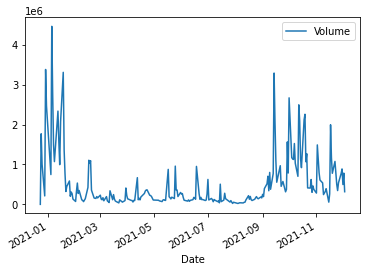

In [50]:
#Some quick plots

#One of the lowest value_counts 
stock_1 = dframe[dframe['SecuritiesCode'] == 4169]
stock_1.plot('Date', 'Volume', kind='line')

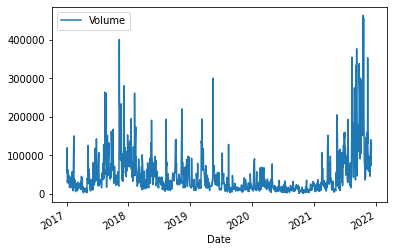

In [51]:
#One of the Hhghest value_counts 
stock_1 = dframe[dframe['SecuritiesCode'] == 2780]
stock_1.plot('Date', 'Volume', kind='line')